## Importing Libraries and Datasets

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../data/processed/upi_fraud_dataset_clean.csv")
data_std = pd.read_csv("../data/processed/upi_fraud_dataset_standardized.csv")
data_minmax = pd.read_csv("../data/processed/upi_fraud_dataset_minmax.csv")

X = data.drop(columns=["FraudFlag"])
y = data["FraudFlag"]

## Feature Importance using RF

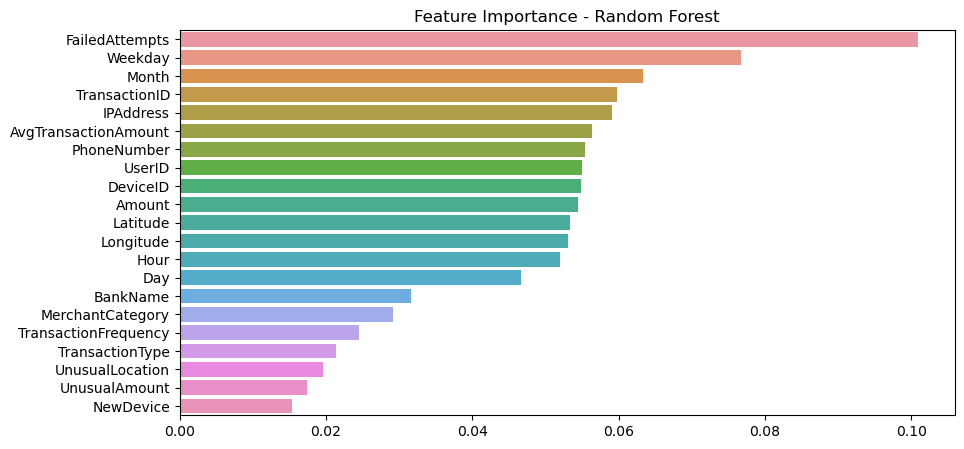

Selected Features:
 ['FailedAttempts', 'Weekday', 'Month', 'TransactionID', 'IPAddress', 'AvgTransactionAmount', 'PhoneNumber', 'UserID', 'DeviceID', 'Amount', 'Latitude', 'Longitude', 'Hour', 'Day', 'BankName', 'MerchantCategory', 'TransactionFrequency', 'TransactionType', 'UnusualLocation', 'UnusualAmount', 'NewDevice']


In [3]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance - Random Forest")
plt.show()

important_features = feature_importance[feature_importance > 0.01].index.tolist()
print("Selected Features:\n", important_features)

## Feature Selection using Chi-Square Test

In [4]:
chi2_selector = SelectKBest(score_func=chi2, k=10)
X_chi2 = chi2_selector.fit_transform(X, y)

selected_chi2_features = X.columns[chi2_selector.get_support()].tolist()
print("Chi-Square Selected Features:", selected_chi2_features)

Chi-Square Selected Features: ['TransactionID', 'UserID', 'TransactionType', 'DeviceID', 'IPAddress', 'TransactionFrequency', 'UnusualLocation', 'UnusualAmount', 'NewDevice', 'PhoneNumber']


## Feature Selection using Mutual Information

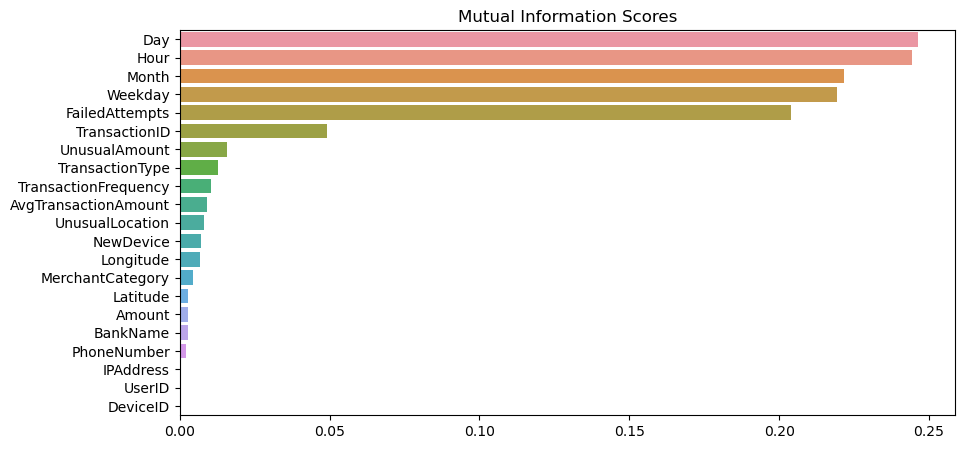

Mutual Information Selected Features: ['Day', 'Hour', 'Month', 'Weekday', 'FailedAttempts', 'TransactionID', 'UnusualAmount', 'TransactionType', 'TransactionFrequency']


In [5]:
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=mutual_info_series.values, y=mutual_info_series.index)
plt.title("Mutual Information Scores")
plt.show()

selected_mi_features = mutual_info_series[mutual_info_series > 0.01].index.tolist()
print("Mutual Information Selected Features:", selected_mi_features)

## Dimensionality Reduction using PCA

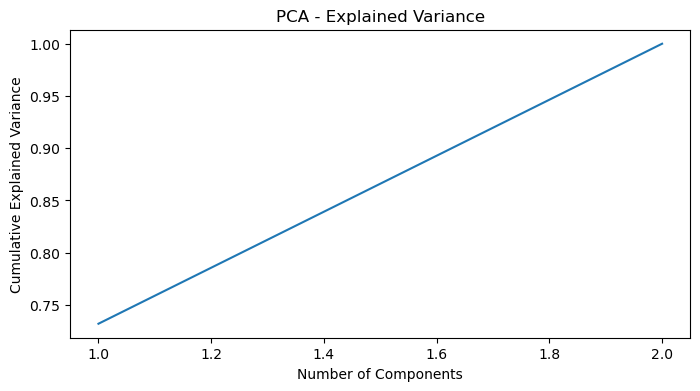

In [6]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.show()

## Finalizing Selected Features

In [7]:
final_selected_features = list(set(important_features) | set(selected_chi2_features) | set(selected_mi_features))

data_final = data[final_selected_features + ['FraudFlag']]

data_final.to_csv("../data/processed/upi_fraud_feature_engineered.csv", index=False)
print("Final dataset shape:", data_final.shape)

Final dataset shape: (11744, 22)
